# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [43]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import geoviews as gv
import os


# Import API key
from api_keys import geoapify_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,port-vila,-17.7338,168.3219,25.47,84,100,7.71,VU,1713365531
1,1,jamestown,42.0970,-79.2353,14.29,84,100,2.06,US,1713365400
2,2,port alfred,-33.5906,26.8910,25.10,69,1,6.46,ZA,1713365532
3,3,puerto natales,-51.7236,-72.4875,13.25,62,75,4.63,CL,1713365533
4,4,port-aux-francais,-49.3500,70.2167,3.32,98,100,11.10,TF,1713365533


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Scatter   [Lng]   (Lat,_size)
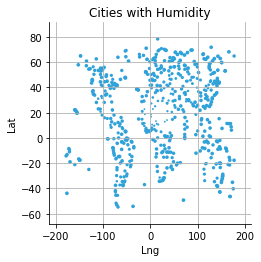

In [32]:
#%%capture --no-display

key = geoapify_key 

# Configure the map plot
gv.extension(api_key=key)

# Extract data (assuming columns Lat, Lng, and Humidity)
df = city_data_df[["Lat", "Lng", "Humidity"]]

# Create a point plot on a map with marker size based on humidity
map = (
    df.hvplot(
        x="Lng",
        y="Lat",
        kind="scatter",
        size=df["Humidity"] * 2,  # Adjust scaling factor for marker size
        #geo=True,  #Enable GeoViews for map visualization
        #tiles="OSM", # Use OpenSteetMap as base map
        frame_width=800,
        frame_height=600,
        title="Cities with Humidity",
        #projection="Mercator", # Choose a map projection
    )
    .opts(
        show_grid=True, # Display grid on the map
        #colorbar=True,  # Enable colorbar for humidity legend
        #colormapper="viridis",  # Choose a color mapper for the colorbar
    )
)
# Display the map
map

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [34]:
# Narrow down cities that fit criteria and drop any results with null values
# Ideal weather conditons can be subjective. I choose to consider temperature,windspeed, & cloudiness to characterize weather condition
ideal_weather_df = city_data_df[(city_data_df["Max Temp"] < 26) &
                               (city_data_df["Max Temp"] > 20) &
                                (city_data_df["Cloudiness"] == 0)&
                               (city_data_df["Wind Speed"] < 4.5)]
# Drop any rows with null values
ideal_weather_df = ideal_weather_df.dropna()

# Display sample data
ideal_weather_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
18,18,hobbs,32.7026,-103.1360,22.04,13,0,3.09,US,1713365547
88,88,coffeyville,37.0373,-95.6164,23.81,55,0,3.09,US,1713365602
144,144,kailua-kona,19.6406,-155.9956,25.33,64,0,3.60,US,1713365578
149,149,holualoa,19.6228,-155.9522,23.26,21,0,3.60,US,1713365640
163,163,tazacorte,28.6290,-17.9293,23.54,69,0,2.06,ES,1713365650
210,210,teguise,29.0605,-13.5640,21.12,73,0,3.09,ES,1713365686
289,289,lagrange,33.0393,-85.0313,22.46,53,0,2.57,US,1713365756
297,297,port elizabeth,-33.9180,25.5701,25.17,62,0,4.12,ZA,1713365762
390,390,valenza,45.0141,8.6414,20.20,29,0,1.82,IT,1713365838
422,422,qulsary,46.9531,54.0198,24.15,29,0,3.87,KZ,1713365866


### Step 3: Create a new DataFrame called `hotel_df`.

In [35]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = ideal_weather_df[["City","Country", "Lat", "Lng", "Humidity"]].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = None

# Display sample data
hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
18,hobbs,US,32.7026,-103.1360,13,None
88,coffeyville,US,37.0373,-95.6164,55,None
144,kailua-kona,US,19.6406,-155.9956,64,None
149,holualoa,US,19.6228,-155.9522,21,None
163,tazacorte,ES,28.6290,-17.9293,69,None


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
# Set parameters to search for a hotel
radius = 10000 #meters

params = {"apikey": geoapify_key,
        "filter": f"circle:{radius}@{latitude},{longitude}",
        "bias": f"proximity:{latitude}, {longitude}"
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    latitude = row["Lat"]
    longitude = row["Long"]
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{radius},{lat},{long}"
    params["bias"] = f"proximity:{lat},{long}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"


    # Make and API request using the params dictionaty
    name_address = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = response.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
kapaa - nearest hotel: Pono Kai Resort
hilo - nearest hotel: Dolphin Bay Hotel
banda - nearest hotel: #acnindiafy21
makakilo city - nearest hotel: Embassy Suites by Hilton Oahu Kapolei
kahului - nearest hotel: Maui Seaside Hotel
gat - nearest hotel: No hotel found
laguna - nearest hotel: Holiday Inn Express & Suites
tikaitnagar - nearest hotel: No hotel found
san quintin - nearest hotel: Jardines Hotel
santa rosalia - nearest hotel: Hotel del Real
narwar - nearest hotel: No hotel found
port hedland - nearest hotel: The Esplanade Hotel
roebourne - nearest hotel: No hotel found
saint-francois - nearest hotel: Chez Lily
capoterra - nearest hotel: Rosa Hotel
stolac - nearest hotel: Bregava
guerrero negro - nearest hotel: Plaza sal paraiso


,City,Country,Lat,Lng,Humidity,Hotel Name
45,kapaa,US,22.0752,-159.3190,84,Pono Kai Resort
51,hilo,US,19.7297,-155.0900,83,Dolphin Bay Hotel
63,banda,IN,25.4833,80.3333,52,#acnindiafy21
81,makakilo city,US,21.3469,-158.0858,81,Embassy Suites by Hilton Oahu Kapolei
152,kahului,US,20.8947,-156.4700,60,Maui Seaside Hotel
197,gat,IL,31.6100,34.7642,100,No hotel found
211,laguna,US,38.4210,-121.4238,79,Holiday Inn Express & Suites
240,tikaitnagar,IN,26.9500,81.5833,59,No hotel found
265,san quintin,MX,30.4833,-115.9500,74,Jardines Hotel
340,santa rosalia,MX,27.3167,-112.2833,56,Hotel del Real


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [58]:
import folium

# Define example latitude and longitude values
latitude = 22.0752
longitude = -156.4700

# Create a map centered at a specific location
mymap = folium.Map(location=[latitude, longitude], zoom_start=5)

# Iterate through each city in hotel_df
for index, row in hotel_df.iterrows():
    city = row['City']
    country = row['Country']
    hotel_name = row['Hotel Name']
    lat = row['Lat']
    lng = row['Lng']

    # Create a marker for each city
    marker = folium.Marker(location=[lat, lng], popup=f"{city}, {country} - {hotel_name}")

    # Add the marker to the map
    marker.add_to(mymap)

# Save the map to an HTML file
mymap.save("hotel_map.html")

# Display the map
mymap
